# Quickstart

This notebook shows the minimum you need to:

* Create a Matplotlib axis with the Smith chart projection.
* Plot a few impedances on the chart.
* Add labels with `ax.text()`.

Defaults:

* Default plotting is in the impedance domain with datapoints in ohms.
* The default characteristic impedance is $Z_0=50 \Omega$.
* `pysmithchart` normalizes internally by the characteristic impedance $Z_0$.

In [1]:
%config InlineBackend.figure_format = 'retina'

import sys
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite

    await piplite.install("pysmithchart")

# Importing pysmithchart registers the "smith" Matplotlib projection.
import pysmithchart

## Create a Smith chart axis

The best way to set up Matplotlib to use the Smith (Möbius) transform is:

```python
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")
```

The example below creation of the plot and automatic generation of Smith chart gridlines.

In general, impedances are complex numbers.  The simplest way to plot with `pysmithchart` is to pass the complex numbers as values. The default expectation is that all numbers you supply should be *unnormalized* impedances in ohms.

You can pass complex values directly to `ax.plot(...)`, `ax.scatter(...)`, `ax.annotate(...)`, and `ax.text(...)`

> You might be concerned the usual plot call in **matplotlib** requires both `x` and `y` values, i.e., `ax.plot(x,y)`  ``pysmithplot` converts the complex impedance values to real and imaginary components internally. Two element plotting is still available if you do `ax.plot(z.imag, z.real)`


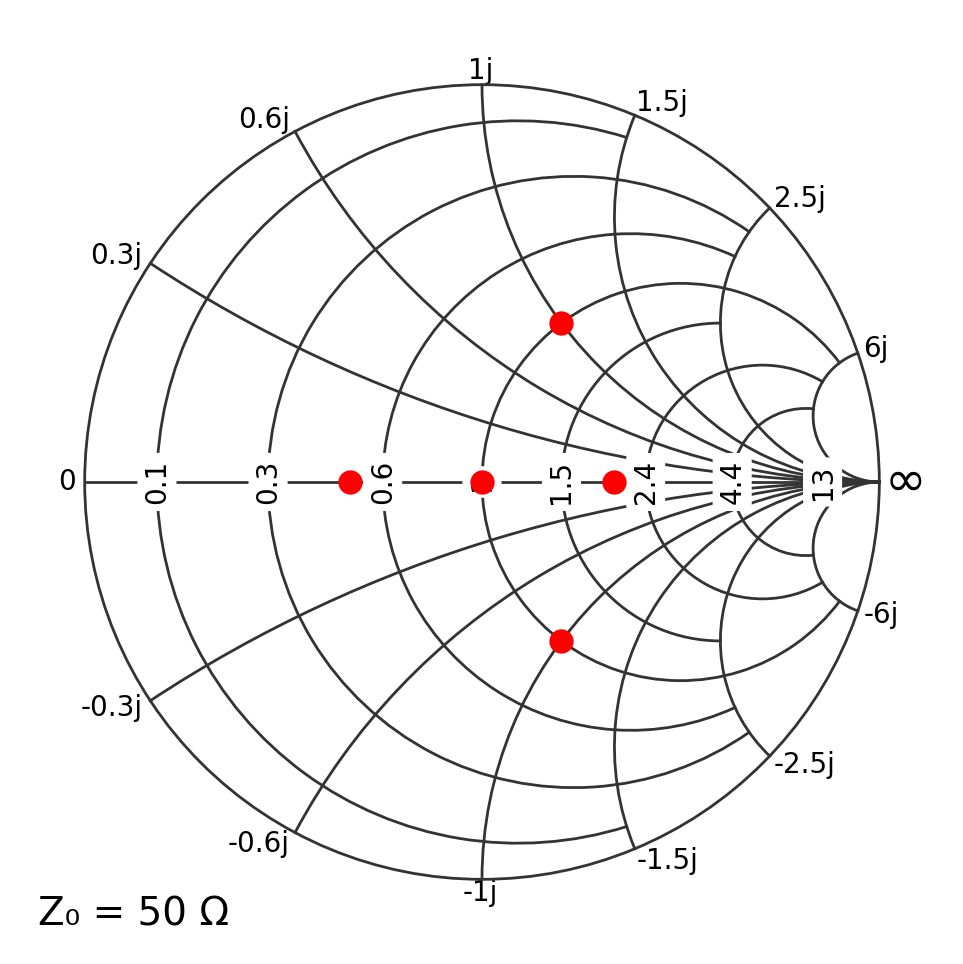

In [6]:
Z = [
    50 + 0j,  # matched load
    100 + 0j,  # higher resistance
    25 + 0j,  # lower resistance
    50 + 50j,  # inductive
    50 - 50j,  # capacitive
]

# two line setup for graph
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")

# plot the points
ax.scatter(Z, s=60, color="red")
plt.show()

## Changing the default characteristic impedance

In the default impedance domain, you supply impedances in ohms, and `pysmithchart` normalizes internally by Z₀.

* If your system is 50 Ω (common in RF), you can use the default.
* If you want a different Z₀, pass it when creating the axes.

Examples:

```python
ax = plt.subplot(111, projection="smith")                 # default Z0 = 50Ω
ax = plt.subplot(111, projection="smith", Z0=75)          # change Z0 to 75Ω
```

The example below illustrates an array of impedances can be plotted at once. 

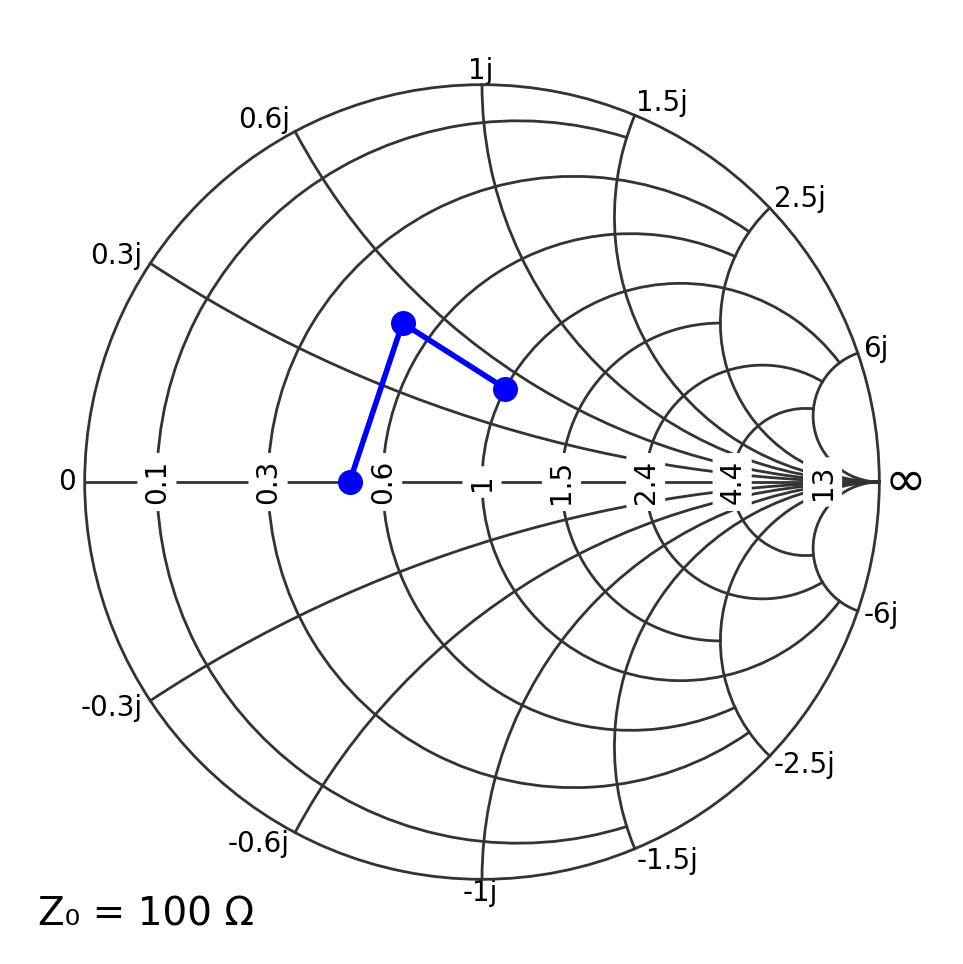

In [12]:
Z = [50 + 0j, 50 + 50j, 100 + 50j]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", Z0=100)  # set Z0 = 100 Ω
ax.plot(Z, "bo-", ms=8)
plt.show()

## Adding labels with `ax.text()`

Use `ax.text(z, "label", ...)` to place text next to the point `Z` in Smith chart.

Important: on a Smith chart, the displayed (screen) coordinates are **not** the same as the data coordinates.
For `pysmithchart`, the data coordinates represent the complex quantity you are plotting in the selected domain:

- In the default impedance domain, `x` and `y` correspond to $\Re\{Z\}$ and $\Im\{Z\}$ in ohms.

A practical trick is to apply a small offset (still in the same domain coordinates) so labels do not sit directly on markers.

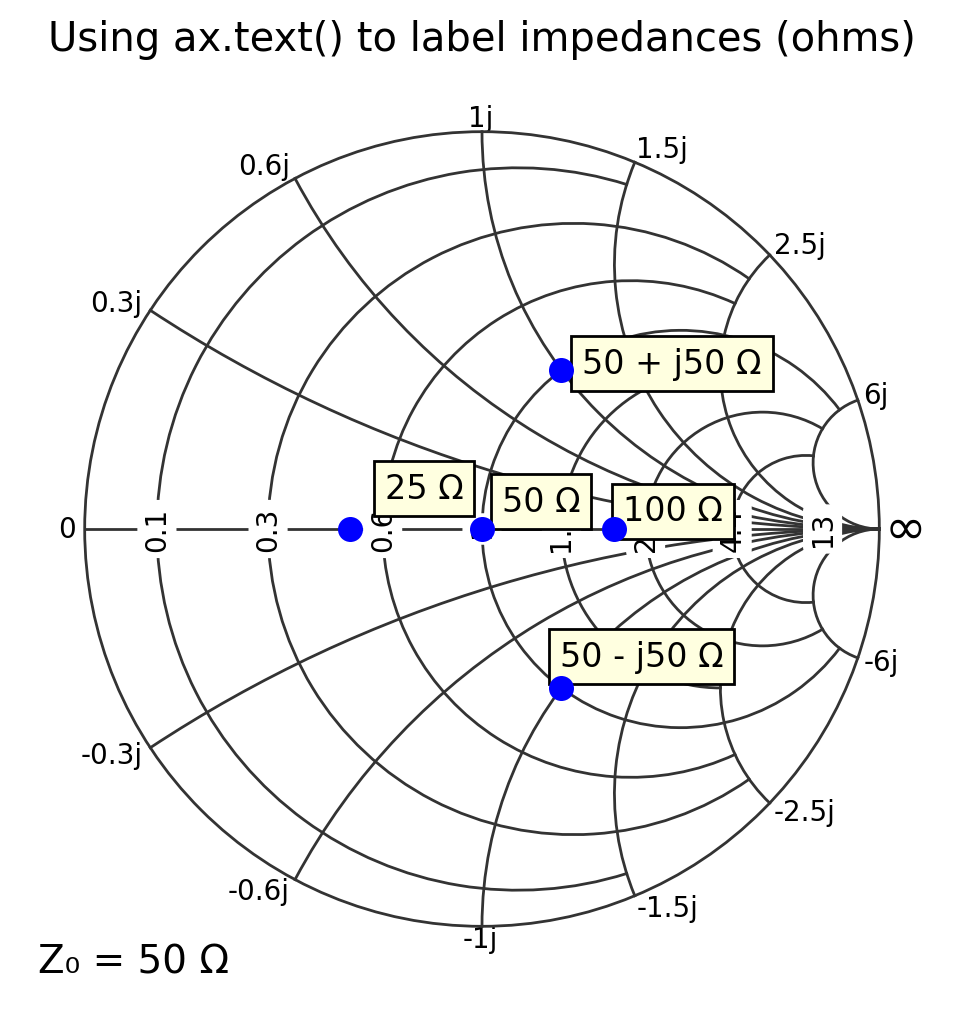

In [16]:
text_box = {"facecolor": "lightyellow", "edgecolor": None}

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")  # default Z0 = 50 Ω

Z0 = 50
Z = np.array([Z0 + 0j, 2 * Z0 + 0j, 0.5 * Z0 + 0j, Z0 + 1j * Z0, Z0 - 1j * Z0])
labels = ["50 Ω", "100 Ω", "25 Ω", "50 + j50 Ω", "50 - j50 Ω"]

ax.plot(Z, "bo", ms=8, ls="")

text_offset = 5 + 5j
for Zi, s in zip(Z, labels):
    ax.text(Zi + text_offset, s, bbox=text_box)

ax.set_title("Using ax.text() to label impedances")
plt.show()